Using 'DeepFashion' Dataset for Test Purposes: (Category and Attribute Prediction Benchmark)

- https://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html


DISC2021 Image Similarity Dataset:
- https://sites.google.com/view/isc2021/dataset

*1- Load and Preprocess Images*

In [8]:
import os
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from PIL import Image

# Directory containing images
image_dir = 'test_images'

# Load and preprocess images
def load_images(image_dir):
    image_list = []
    file_names = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(image_dir, filename)
            img = image.load_img(img_path, target_size=(224, 224))
            img_data = image.img_to_array(img)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)
            image_list.append(img_data)
            file_names.append(filename)
    return np.vstack(image_list), file_names

images, file_names = load_images(image_dir)

# Display number of loaded images
print(f"Loaded {len(images)} images.")

Loaded 38 images.


*2- Extract embeddings using ResNet50*

In [9]:
# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')
model = Model(inputs=model.input, outputs=model.layers[-2].output)

# Extract embeddings
def get_embeddings(model, images):
    embeddings = model.predict(images)
    return embeddings

embeddings = get_embeddings(model, images)
print("Embeddings shape:", embeddings.shape)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 680ms/step
Embeddings shape: (38, 2048)


*3- Calculate Embedding Similarity*

In [ ]:
# Calculate cosine similarity
similarity_matrix = cosine_similarity(embeddings)

*4- Do Visualization*

/Users/busraoguzoglu/PycharmProjects/ImageSimilarity/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


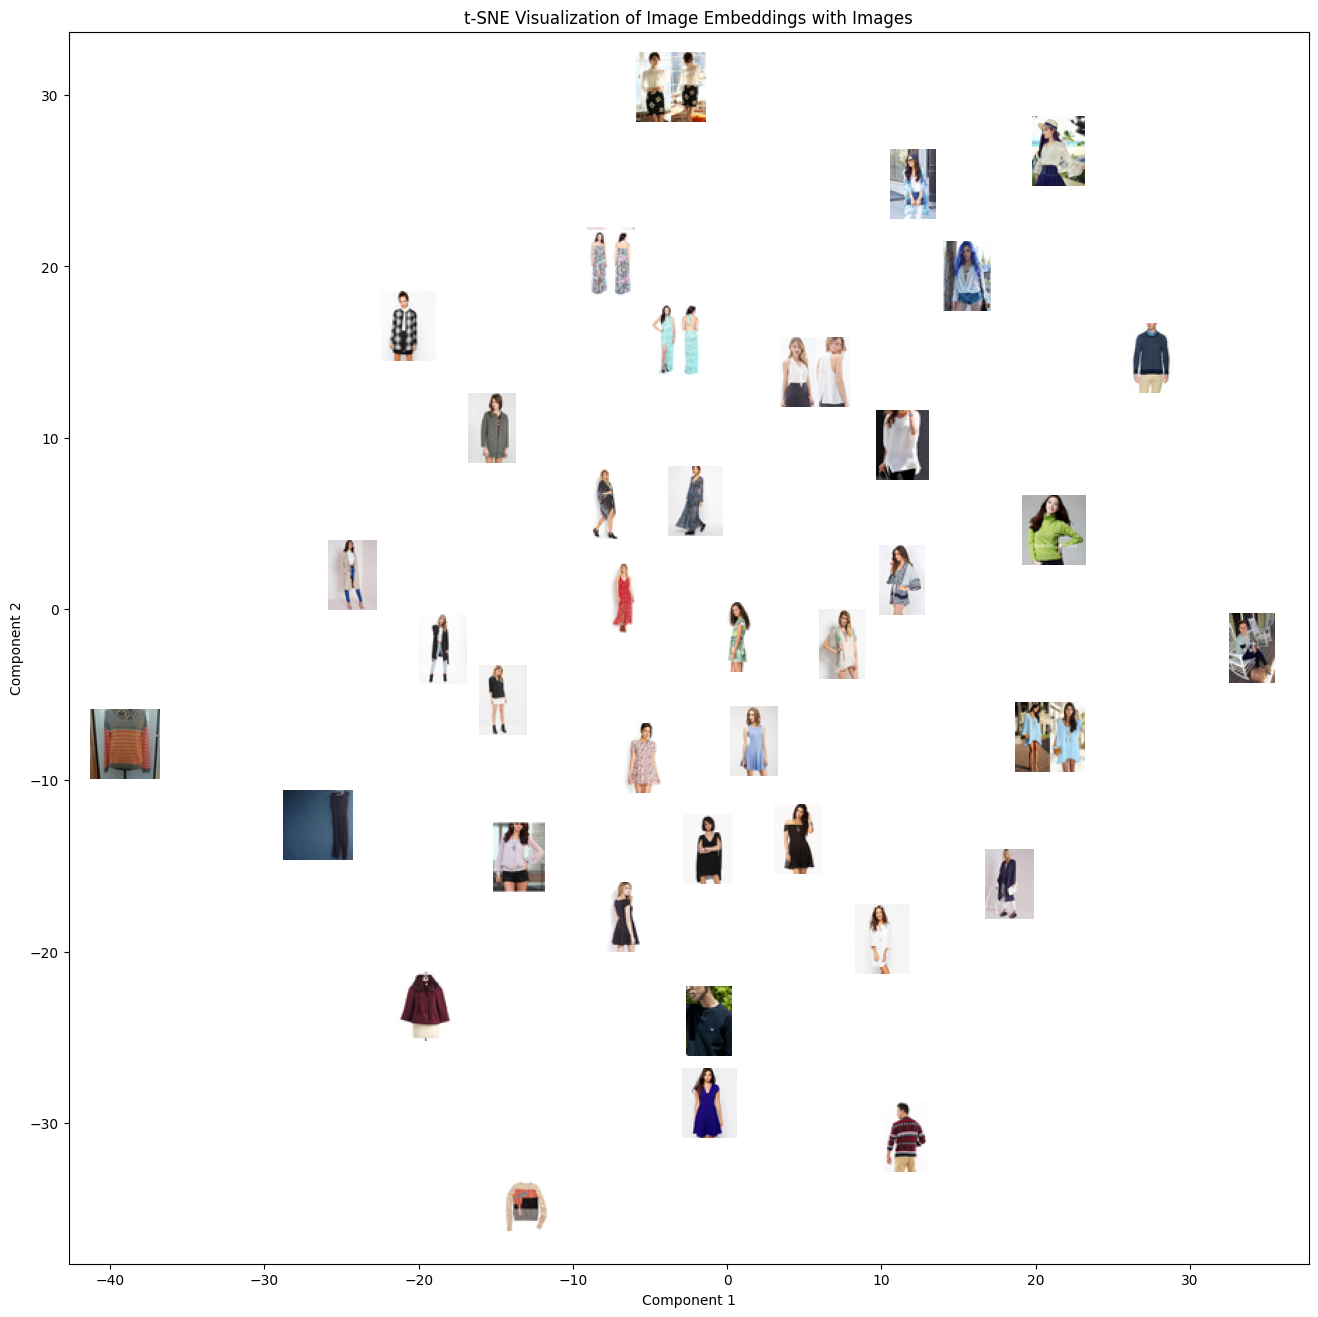

In [13]:
# Function to visualize using t-SNE with images
def visualize_embeddings_with_images(embeddings, file_names, image_dir):
    tsne = TSNE(n_components=2, perplexity=15, n_iter=300)
    tsne_results = tsne.fit_transform(embeddings)
    
    fig, ax = plt.subplots(figsize=(16, 16))
    for i, filename in enumerate(file_names):
        x, y = tsne_results[i, :]
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)
        img.thumbnail((50, 50), Image.LANCZOS)
        img = np.array(img)
        if img.shape[2] == 4:  # Convert RGBA to RGB if necessary
            img = img[:, :, :3]
        img_box = OffsetImage(img, zoom=1)
        ab = AnnotationBbox(img_box, (x, y), frameon=False)
        ax.add_artist(ab)
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0)  # To set the limits of the plot
    plt.title('t-SNE Visualization of Image Embeddings with Images')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Replace with the path to your images directory
visualize_embeddings_with_images(embeddings, file_names, image_dir)